In [103]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("library.R", local = T)

In [104]:
sheets <- c("20min STM", "1hr STM", "2hr STM", "3hr STM")
stm_experiments <-  c("20min STM", "1hr STM", "2hr STM", "3hr STM", "20min dunc")
data_clean_long <- data.table::fread(file = "tidy_data.csv")
data_clean_long$test <- factor(data_clean_long$test, levels=c("PRE", "POST"))
data_clean_long[interval == "NONE", interval := "No SD"]
data_clean_long$interval <- factor(data_clean_long$interval, levels=c("ZT05-ZT11", "ZT12-ZT18", "ZT05-ZT24", "No SD"))

data_clean_long$experiment <- factor(data_clean_long$experiment, levels=c(sheets, "LTM", "LTM CHX", "20min dunc"))

In [105]:
panel5_data <- data_clean_long[experiment == "LTM" & Training_session=="6X_Spaced",]
panel5_data$experiment <- factor(panel5_data$experiment, levels=c("LTM"))

panel5_data[, group := paste0(interval, "_", test)]
panel5_data$group <- factor(panel5_data$group, levels=unique(paste0(panel5_data$interval, "_", panel5_data$test)))


In [106]:
panel5_data <- panel5_data[order(test, fly_name_reference),]

[1] -1.02  0.75


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”


$gg

$n_facets
[1] 3

$direction
[1] "horizontal"


png 
  2

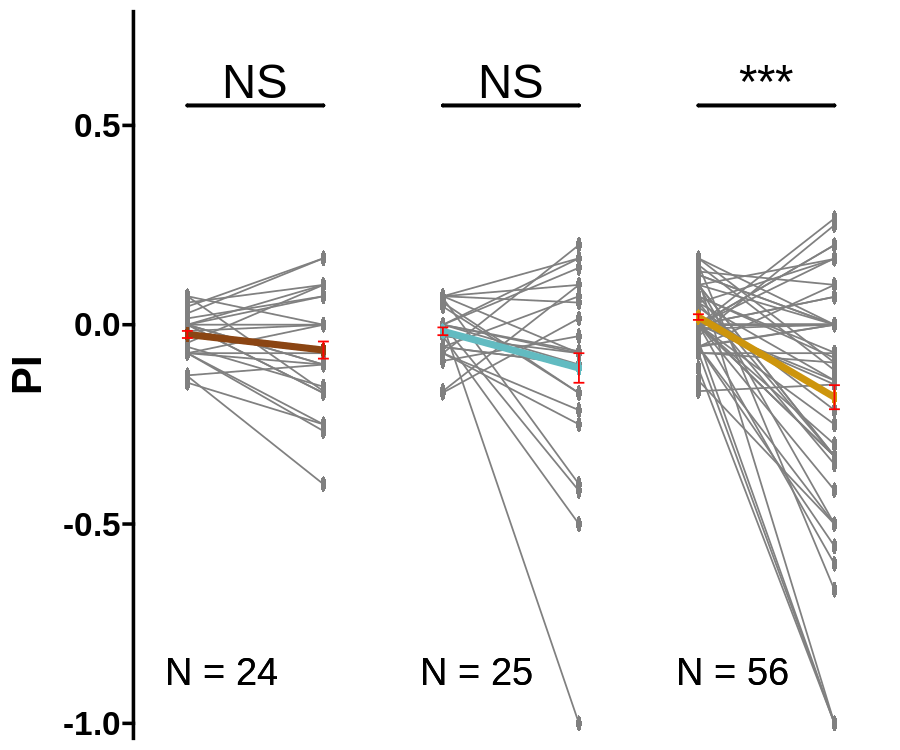

In [107]:
ratio=2.5
size_unit=2.5
panel5 <- learning_plot(
    panel5_data[Genotype=="Iso31" & interval != "ZT05-ZT24",], "interval",
    map_signif_level=TRUE, test=paired_t_test,
    colors=colors_panel5[c(1,2,4)], starsize=10,
    y_annotation=0.55, textsize=8,
    y_limits=c(-1, 0.75),
    hjust_text=0.2
)
options(repr.plot.width=size_unit*panel5$n_facets, repr.plot.height=size_unit*ratio)
panel5
save_learning_plot(plot=panel5, filename = "figures/panel5A.svg", ratio=ratio, size_unit = size_unit)

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”


$gg

$n_facets
[1] 3


Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”


png 
  2

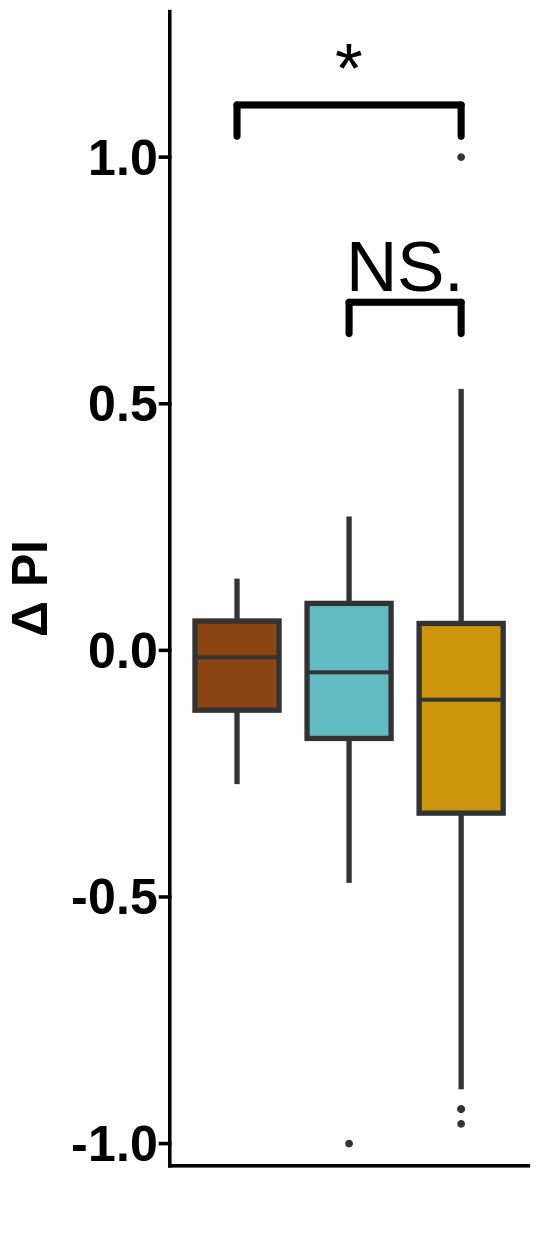

In [112]:
size_unit=1.5
ratio=7
panel5B <- summary_plot(
    data=panel5_data[interval != "ZT05-ZT24",], "interval",
    comparisons=list(
        # c("ZT05-ZT11", "ZT12-ZT18"),
        # c("ZT12-ZT18", "No SD"),
        c("ZT05-ZT11", "No SD"),
        c("ZT12-ZT18", "No SD")
    ),
    annotation_y=c(1, 0.6),
    test=unpaired_t_test,
    colors=colors_panel5[c(1,2,4)],
    y_limits=c(-1, 1.25),
    text_y_size=30,
    title_y_size=30
)

panel5B$gg <- panel5B$gg + theme(
    axis.ticks.x = element_blank(), axis.text.x = element_blank()
)
options(repr.plot.width=size_unit*panel5B$n_facets, repr.plot.height=size_unit*ratio)
panel5B
save_summ_plot(plot=panel5B, filename = "figures/panel5B.svg", ratio=ratio, size_unit = size_unit)

In [95]:
RColorBrewer::brewer.pal

function (n, name) 
{
    if (!(name %in% namelist)) {
        stop(paste(name, "is not a valid palette name for brewer.pal\n"))
    }
    if (n < 3) {
        warning("minimal value for n is 3, returning requested palette with 3 different levels\n")
        return(brewer.pal(3, name))
    }
    if (n > maxcolors[which(name == namelist)]) {
        warning(paste("n too large, allowed maximum for palette", 
            name, "is", maxcolors[which(name == namelist)]), 
            "\nReturning the palette you asked for with that many colors\n")
        return(brewer.pal(maxcolors[which(name == namelist)], 
            name))
    }
    switch(name, Accent = switch(n - 2, rgb(c(127, 190, 253), 
        c(201, 174, 192), c(127, 212, 134), maxColorValue = 255), 
        rgb(c(127, 190, 253, 255), c(201, 174, 192, 255), c(127, 
            212, 134, 153), maxColorValue = 255), rgb(c(127, 
            190, 253, 255, 56), c(201, 174, 192, 255, 108), c(127, 
            212, 134, 153, 176), maxColorValue = 255), rgb(c(127, 
            190, 253, 255, 56, 240), c(201, 174, 192, 255, 108, 
            2), c(127, 212, 134, 153, 176, 127), maxColorValue = 255), 
        rgb(c(127, 190, 253, 255, 56, 240, 191), c(201, 174, 
            192, 255, 108, 2, 91), c(127, 212, 134, 153, 176, 
            127, 23), maxColorValue = 255), rgb(c(127, 190, 253, 
            255, 56, 240, 191, 102), c(201, 174, 192, 255, 108, 
            2, 91, 102), c(127, 212, 134, 153, 176, 127, 23, 
            102), maxColorValue = 255)), Blues = switch(n - 2, 
        rgb(c(222, 158, 49), c(235, 202, 130), c(247, 225, 189), 
            maxColorValue = 255), rgb(c(239, 189, 107, 33), c(243, 
            215, 174, 113), c(255, 231, 214, 181), maxColorValue = 255), 
        rgb(c(239, 189, 107, 49, 8), c(243, 215, 174, 130, 81), 
            c(255, 231, 214, 189, 156), maxColorValue = 255), 
        rgb(c(239, 198, 158, 107, 49, 8), c(243, 219, 202, 174, 
            130, 81), c(255, 239, 225, 214, 189, 156), maxColorValue = 255), 
        rgb(c(239, 198, 158, 107, 66, 33, 8), c(243, 219, 202, 
            174, 146, 113, 69), c(255, 239, 225, 214, 198, 181, 
            148), maxColorValue = 255), rgb(c(247, 222, 198, 
            158, 107, 66, 33, 8), c(251, 235, 219, 202, 174, 
            146, 113, 69), c(255, 247, 239, 225, 214, 198, 181, 
            148), maxColorValue = 255), rgb(c(247, 222, 198, 
            158, 107, 66, 33, 8, 8), c(251, 235, 219, 202, 174, 
            146, 113, 81, 48), c(255, 247, 239, 225, 214, 198, 
            181, 156, 107), maxColorValue = 255)), BrBG = switch(n - 
        2, rgb(c(216, 245, 90), c(179, 245, 180), c(101, 245, 
        172), maxColorValue = 255), rgb(c(166, 223, 128, 1), 
        c(97, 194, 205, 133), c(26, 125, 193, 113), maxColorValue = 255), 
        rgb(c(166, 223, 245, 128, 1), c(97, 194, 245, 205, 133), 
            c(26, 125, 245, 193, 113), maxColorValue = 255), 
        rgb(c(140, 216, 246, 199, 90, 1), c(81, 179, 232, 234, 
            180, 102), c(10, 101, 195, 229, 172, 94), maxColorValue = 255), 
        rgb(c(140, 216, 246, 245, 199, 90, 1), c(81, 179, 232, 
            245, 234, 180, 102), c(10, 101, 195, 245, 229, 172, 
            94), maxColorValue = 255), rgb(c(140, 191, 223, 246, 
            199, 128, 53, 1), c(81, 129, 194, 232, 234, 205, 
            151, 102), c(10, 45, 125, 195, 229, 193, 143, 94), 
            maxColorValue = 255), rgb(c(140, 191, 223, 246, 245, 
            199, 128, 53, 1), c(81, 129, 194, 232, 245, 234, 
            205, 151, 102), c(10, 45, 125, 195, 245, 229, 193, 
            143, 94), maxColorValue = 255), rgb(c(84, 140, 191, 
            223, 246, 199, 128, 53, 1, 0), c(48, 81, 129, 194, 
            232, 234, 205, 151, 102, 60), c(5, 10, 45, 125, 195, 
            229, 193, 143, 94, 48), maxColorValue = 255), rgb(c(84, 
            140, 191, 223, 246, 245, 199, 128, 53, 1, 0), c(48, 
            81, 129, 194, 232, 245, 234, 205, 151, 102, 60), 
            c(5, 10,

In [48]:
zt05_11 <- paste0("ZT", seq(5, 10.5, 0.5))
zt12_18 <- paste0("ZT", seq(12, 17.5, 0.5))
zt05_24 <- paste0("ZT", seq(5, 23.5, 0.5))
zt_all <- paste0("ZT", seq(4, 30, 0.5))
zts <- list(
    zt05_11 = zt05_11,
    zt12_18 = zt12_18,
    zt05_24 = zt05_24,
    zt_all = zt_all
)

In [49]:
options(repr.plot.height=5, repr.plot.width=5)
compute_sleep_at_intervals <- function(df, zts, zt) {
    df$asleep_total <- apply(df, MARGIN = 1, function(x) sum(as.numeric(x[zts[[zt]]]), na.rm=TRUE)) * 30
    df[, asleep_fraction := 100*asleep_total / (length(zts[[zt]])*30)]
    df[
        apply(
            is.na(df[, sort(unique(unlist(zts))), with=FALSE]),
            1,
            all
        ),
        asleep_fraction := NA
    ]
    
                             
    df$sleep_interval <- zt
    return(df)
}

In [21]:
panel4b_data <- do.call(
    rbind,
    lapply(
        names(zts),
        function(zt) {compute_sleep_at_intervals(panel4_data[interval=="NONE" & test == "POST",], zts, zt)}
    )
)

panel4b_data$sleep_interval <- factor(panel4b_data$sleep_interval, levels=c("zt05_11", "zt12_18", "zt05_24", "zt_all"))

ERROR: Error in apply(df, MARGIN = 1, function(x) sum(as.numeric(x[zts[[zt]]]), : object 'panel4_data' not found


In [ ]:
options(repr.plot.width=15)
options(repr.plot.height=5)
# mins_max <- ceiling(max(panel4b_data$asleep_total) / 60) * 60
# breaks <- seq(0, mins_max, max(ceiling(mins_max/3 / 60)*60, 60))
options(repr.plot.width=20)
panel4b <- ggplot(
    data=panel4b_data,
    mapping = aes(x=asleep_fraction, y=PI)
) + geom_point() +
    geom_smooth(method = MASS::rlm) + labs(x="") + 
    # scale_x_continuous(breaks=breaks, limits=c(0, rev(breaks)[1])) +
    scale_x_continuous(breaks=seq(0, 100, 20), limits=c(0, 100)) +
    # scale_y_continuous(limits=c(-0.5, 0.3)) +
    scale_y_continuous(breaks=seq(-1, 0.5, 0.2), limits=c(-1, 0.5)) + labs(x="") +
    facet_grid(. ~ sleep_interval)
panel4b

In [ ]:
ggsave(filename = "figures/panel4b.svg", plot = panel4b, width=15, height=5)

In [ ]:
options(repr.plot.width=15)
options(repr.plot.height=10)
panel4 <- cowplot::plot_grid(panel4a, panel4b, nrow=2)
panel4

In [ ]:
ggsave(filename = "figures/panel4.svg", plot = panel4, width=7.5, height=10)

In [ ]:
# ?melt

In [ ]:
panel4c_data <- melt(
    data =  data_clean_long[experiment == "LTM" & interval=="NONE" & test == "POST",],
      value.name="asleep",
      variable.name="ZT",
      measure.vars=zts$zt_all,
)
panel4c_data[, t := as.numeric(gsub(pattern = "ZT", x = ZT, replacement = ""))*3600]


panel4d_data <- data_clean_long[experiment == "LTM" & interval=="NONE",]